In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss

In [183]:
df = pd.read_csv('./Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [184]:
df.drop('CustomerID',axis=1,inplace=True)

In [185]:
'''scal = MinMaxScaler()
df[['Age','Annual Income (k$)','Spending Score (1-100)']] = scal.fit_transform(df[['Age','Annual Income (k$)','Spending Score (1-100)']])''' # No escalar

# si es necesario convertir columnas categoricas a numéricas 
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])

In [186]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


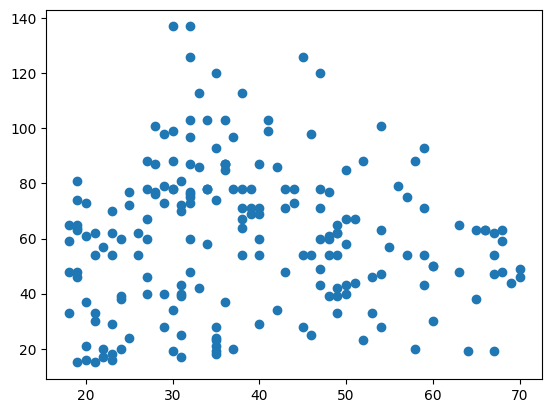

In [187]:
plt.scatter(df['Age'],df['Annual Income (k$)']);

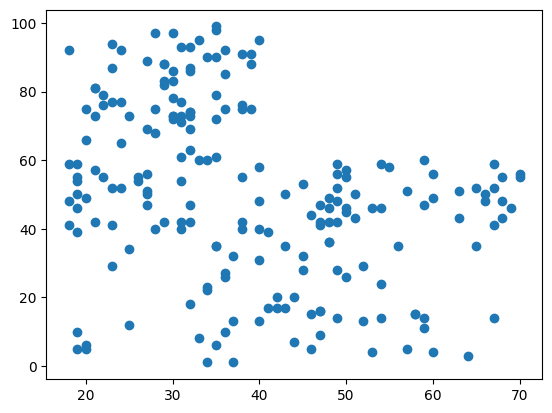

In [188]:
plt.scatter(df['Age'],df['Spending Score (1-100)']);

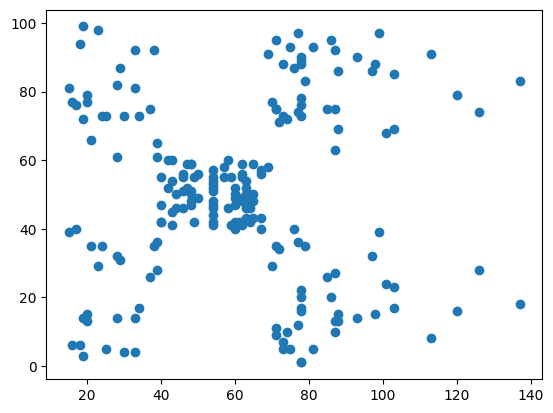

In [189]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)']);

In [190]:
# Escogemos la mejor combinancion de parametros
from itertools import product

epsilons = np.arange(8,12.75,0.25)
min_samples = np.arange(3,10)

dbscan_params = list(product(epsilons,min_samples))

In [191]:

N = len(dbscan_params)
N

133

In [192]:
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps,num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps,min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)

    if -1 in labels_set:
      num_clusters-=1

    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f'Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on')
      continue

    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    print(f'Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}')
  best_index = np.argmax(scores)
  best_params = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  tmp = pd.DataFrame.from_records(combinations, columns=['Eps','Min_samples'])
  tmp['Sil_score'] = scores

  pivot_1 = pd.pivot_table(tmp, values='Sil_score',index='Min_samples',columns='Eps')

  fig, ax = plt.subplots(figsize=(18,6))
  sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='YlGnBu',ax=ax)
  return {
    'best_epsilon':best_params[0],
    'best_min_samples': best_params[1],
    'best_labels': best_labels,
    'best_score': best_score
  }


Index: 0, Score: 0.03475749935336234, Labels: [-1  0 -1  0  1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0  1 -1 -1 -1  1  0 -1  0
  2  0 -1 -1 -1  0 -1  0 -1 -1  2  0  2 -1 -1  0 -1 -1  3  4 -1 -1  3  4
  4  4  3  4  4  5  3  3  3  5  4  3  5  6  5  5  5  6  3  5  6  4  5  3
  5  5  5  6  3  3  6  3  5  3 -1  3  6  3  5  6  3  3  7  6  3  8  8  6
  3  6  3  6  6  3  7  6  3  6  7  3  7  7  7  6  8  6  6  6  7  3  3  3
  6  8 -1 -1 10  9 -1 -1 -1  9 -1  9 10  9 11  9 -1  9 11  9 -1  9 10  9
 11  9 -1  9 -1  9 12  9 12  9 12  9 -1  9 -1  9 -1  9 -1  9 -1  9 13  9
 -1 15 13 15 13  9 14 -1 14 15 14  9 -1  9 -1  9 -1 -1 -1 -1 -1  9 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1], NumClusters: 16
Index: 1, Score: -0.021856063269051217, Labels: [-1  0 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0 -1 -1 -1 -1 -1  0 -1  0
 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1  2  1
  1  1  2 -1  1 -1  2  2  2  3  1  2  3  4  3  3  3  4  2  3  4  1  3  2
  3  3  3  4  2  2  4  2  3  2 -1  2  4  2  3  4  2  2  5  4

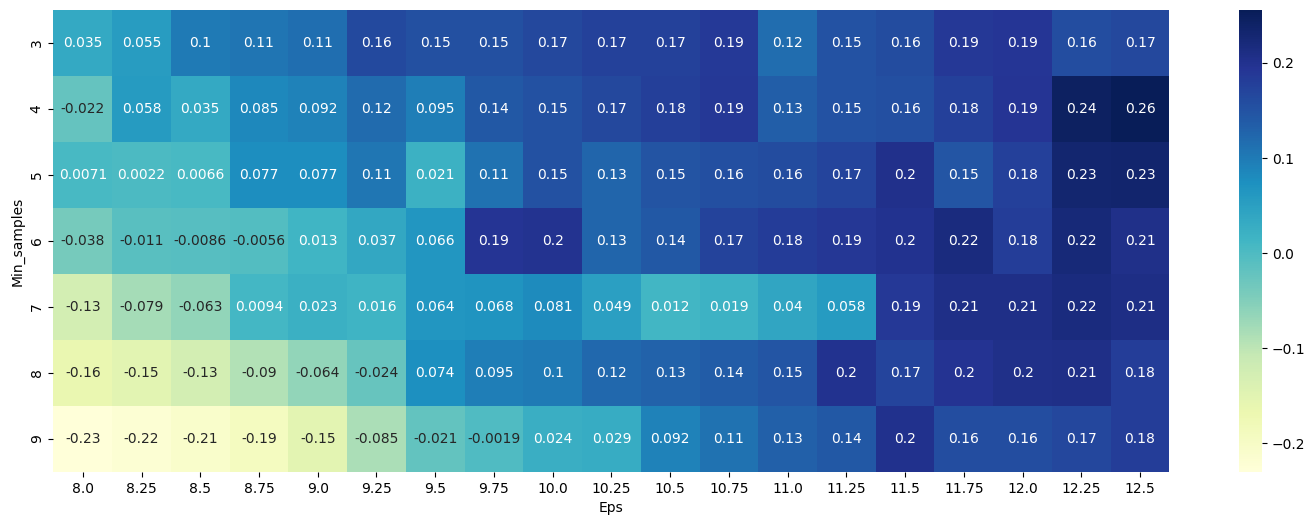

In [193]:

best_dict = get_scores_and_labels(dbscan_params, df.values)

In [194]:
best_dict

{'best_epsilon': 12.5,
 'best_min_samples': 4,
 'best_labels': array([ 0,  0, -1,  0,  0,  0, -1, -1,  1,  0, -1, -1,  1,  0, -1,  0,  0,
         0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
         1,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  4,  2,
         3,  2,  4,  2,  3,  2,  0,  2,  4,  2,  0,  2,  3,  2,  3,  2,  3,
         2,  3,  2,  3,  2, -1,  2,  3,  2,  4,  2,  3,  2,  3,  2,  3,  2,
         3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,
        -1,  3,  2,  3, -1, -1,  2, -1, -1, -1, -1, -1, -1], dtype=int64),
 'best_score': 0.2554122926

In [195]:
df['cluster'] = best_dict['best_labels']
df['cluster'].value_counts()

cluster
 0    112
 2     34
 3     24
-1     18
 1      8
 4      4
Name: count, dtype: int64

In [196]:
dbscan = DBSCAN(eps=12.5,min_samples=4).fit(df.values)
df

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,-1
3,0,23,16,77,0
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,-1
196,0,45,126,28,-1
197,1,32,126,74,-1
198,1,32,137,18,-1


In [197]:
dbscan_clust_sizes = df.groupby('cluster').size().to_frame()
dbscan_clust_sizes.columns = ['DBSCAN_size']
dbscan_clust_sizes

,DBSCAN_size
cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


In [199]:
df.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'cluster'],
      dtype='object')

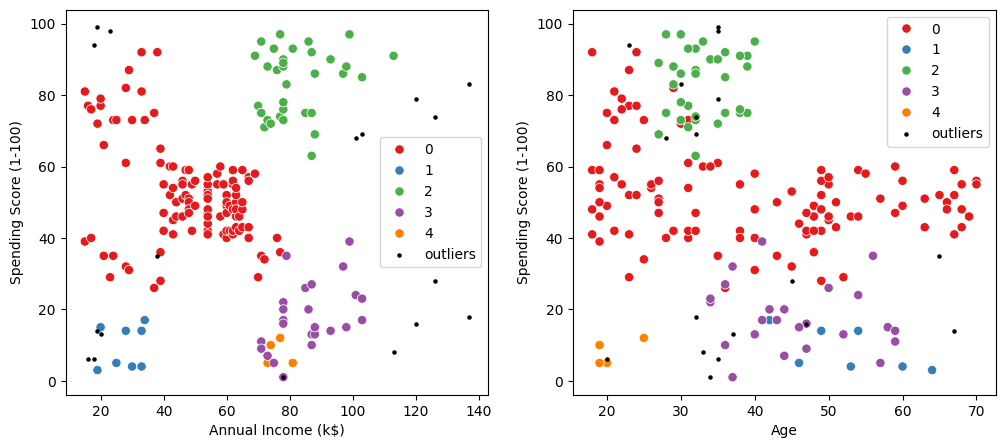

In [209]:
outliers = df[df['cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)', 
                data=df[df['cluster']!=-1], 
                hue='cluster', 
                ax=axes[0], 
                palette='Set1',
                legend='full',
                s=45)
sns.scatterplot(x='Age',
                y='Spending Score (1-100)', 
                data=df[df['cluster']!=-1], 
                hue='cluster', 
                ax=axes[1], 
                palette='Set1',
                legend='full',
                s=45)
axes[0].scatter(outliers['Annual Income (k$)'], 
                outliers['Spending Score (1-100)'],
                s=5,
                label='outliers',
                c='k')
axes[1].scatter(outliers['Age'], 
                outliers['Spending Score (1-100)'],
                s=5,
                label='outliers',
                c='k')
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(),fontsize='10')
plt.setp(axes[1].get_legend().get_texts(),fontsize='10')

plt.show()